This is the comparison model we built in order as way to benchmark our LSTM model. The essence of this model is to predict the closing price for one day in advance (either up or down) based on historical data.

In [42]:
import pandas as pd
import numpy as np
import datetime
import sys
import quandl
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None 

We started by pulling stock data using the duandl library. Each dataframe initially contained the open/close/high/low price of the stock for each day from 1983-2018. Our goal was to predict whether the stock price would increase or decrease the following day based on previous data. We used five different models to see which ones would perform better on different data sets, with the three we went over in class as well as the Random Forest Classifier and the SVC, which we found to do better on the benchmark data.

In [43]:
def f(s):
    a = [str(x) for x in s]
    a[1] = str(1)
    return "/".join(a)
def add_features(s):
    arr = [c for c in s]
#     add_nasdaq(arr)
    return np.array(arr)
def calcS(df):
    temp = df.shift(1) - df
    temp['delt'] = temp['Close'].apply(sign)
    return temp
def add_features(s):
    arr = [c for c in s]
#     add_nasdaq(arr)
    return np.array(arr)
def sign(x):
    if x > 0:
        return -1
    else:
        return 1

We then calculated the change in price by shifting the dataframe and subtracting it from itself. We took the sign of this value which became the label for each day. We took a benchmark of the classifiers without adding in extra features and saw a pretty low accuracy of 48.1% for naive bayes, but up to 52% for SVC and Random Forest Classifier.

In [44]:
model1 = GaussianNB()
model2 = KNeighborsClassifier()
model3 = BernoulliNB()
model4 = RandomForestClassifier()
model5 = SVC()
dfA = quandl.get("WIKI/AMD")
dfA.tail()
dfI = quandl.get("WIKI/INTC")
dfI.tail()
dfN = quandl.get("WIKI/NVDA")
dfN.tail(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-14,249.45,250.55,246.220,248.74,12573947.0,0.0,1.0,249.45,250.55,246.220,248.74,12573947.0
2018-03-15,249.29,252.62,247.640,249.34,9992834.0,0.0,1.0,249.29,252.62,247.640,249.34,9992834.0
2018-03-16,250.00,251.25,248.480,250.48,9634107.0,0.0,1.0,250.00,251.25,248.480,250.48,9634107.0
2018-03-19,248.18,249.35,237.000,241.00,17472128.0,0.0,1.0,248.18,249.35,237.000,241.00,17472128.0
2018-03-20,241.12,251.15,241.120,249.58,13725505.0,0.0,1.0,241.12,251.15,241.120,249.58,13725505.0
2018-03-21,249.32,252.00,247.330,248.56,10841782.0,0.0,1.0,249.32,252.00,247.330,248.56,10841782.0
2018-03-22,246.00,247.88,240.341,241.85,13663927.0,0.0,1.0,246.00,247.88,240.341,241.85,13663927.0
2018-03-23,242.40,242.67,232.520,232.97,18225390.0,0.0,1.0,242.40,242.67,232.520,232.97,18225390.0
2018-03-26,238.00,244.53,235.900,244.48,15130542.0,0.0,1.0,238.00,244.53,235.900,244.48,15130542.0


We then looked at features we could add and decided on several that would provide information about global markets as well as historical data on AMD. The first feature was data on the NASDAQ index, which helps define performance of the entire US economy as a whole. We also incorporated google trends data, as a larger trend value could mean larger variance in stock price the following day. Finally, we incorporated company specific data, in calculating the moving-average of 5 and 10 days, essentially the average closing price over the period of time, because crossing the moving average or pulling away from it can define the start of a bull or bear trend. We then added features based on financial ratios found on the balance sheet such as beta, the volatility of the stock, as well as price/earnings ratio, a figure that compares the stock price to how much investers make from the stock on average.

In [46]:
quandl.ApiConfig.api_key = 'bjxPxJDJRbGxYNqxstKH'
cols = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
ncols = ["Tdate", "IndexV", "H", "L", "TargetMarket", "DMV"]
dfAR = pd.read_csv('AMD.csv', sep=',', names=cols,
                    encoding='latin-1')
dfn = pd.read_csv('NASDAQ.csv', sep=',', names=ncols,
                    encoding='latin-1')
dfn = dfn[1:]
dfn = dfn[::-1]
dfAR = dfAR[3:]
dfn.head()
dfNratio = pd.read_csv('out.csv', sep=',', header = 0, index_col=0,
                    encoding='latin-1')
dftrends = pd.read_csv('trends.csv', sep=',', header = 0, index_col=0,
                    encoding='latin-1')
dfAmd = pd.read_csv('Amd_historical.csv', sep=',', header = 0, index_col=0,
                    encoding='latin-1')
dfNratio.head()
dftrends.head()
dfAmd.head()

,Open,High,Low,Close,Volume,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,5-day Moving,10-day Moving
Date,,,,,,,,,,,,
3/21/83,35.88,36.13,35.25,36.00,127700.0,8.97,9.03,8.81,9.00,510800.0,35.0,34.56
3/22/83,34.88,35.88,34.00,34.00,82000.0,8.72,8.97,8.50,8.50,328000.0,35.0,34.56
3/23/83,34.00,35.25,33.88,34.88,106800.0,8.50,8.81,8.47,8.72,427200.0,35.0,34.56
3/24/83,34.88,35.13,34.63,35.13,98300.0,8.72,8.78,8.66,8.78,393200.0,35.0,34.56
3/25/83,35.63,36.25,35.00,35.50,52600.0,8.91,9.06,8.75,8.87,210400.0,35.1,34.56


In [47]:
dftrends['d2'] = dftrends.index
dftrends['d2'] = dftrends['d2'].apply(lambda x: str(x)[:7])
# dftrends.head()
dfAc = dfAmd[-1727:]
dfAc['d2'] = dfAc.index
dfAc['d2'] = dfAc['d2'].apply(lambda x: f(str(x).split('/')))
# dfAc.head()
s1 = pd.merge(dfAc, dftrends, how='left', on=['d2'])
s1 = s1.drop(columns=['d2', 'isPartial'])
# s1.head()
dfAc = dfAc.drop(columns=['d2'])
# dfAc.head()
dfAcs = calcS(dfAc)
# dfAcs.head()
dfAcs.shape
featureAmd = [add_features(a) for a in np.array(s1)]
for i in range(len(featureAmd)):
    temp = [float(a) for a in featureAmd[i]]
    temp.extend([float(a) for a in dfNratio.iloc[i]])
    featureAmd[i] = np.array(temp)
#split the data
xtrain = featureAmd[:1000]
xlabels = np.array(dfAcs['delt'])[:1000]
ytest = featureAmd[1000:]
ylables = np.array(dfAcs['delt'])[1000:]
x2 = [item for sublist in xtrain for item in sublist]


In [48]:
# Check for null values in training data
for i in range(len(xtrain)):
    for j in range(len(xtrain[i])):
        if not np.isfinite(xtrain[i][j]):
            print(i, j)
            print("here")

In [49]:
model1.fit(xtrain, xlabels)
predicted1 = model1.predict(ytest)
expected1 = ylables

model2.fit(xtrain, xlabels)
predicted2 = model2.predict(ytest)
expected2 = ylables

model3.fit(xtrain, xlabels)
predicted3 = model3.predict(ytest)
expected3 = ylables

model4.fit(xtrain, xlabels)
predicted3 = model3.predict(ytest)
expected3 = ylables

model5.fit(xtrain, xlabels)
predicted3 = model3.predict(ytest)
expected3 = ylables
print("Gaussian NB\n")
print(metrics.accuracy_score(expected1, predicted1))
print(metrics.classification_report(expected1, predicted1))
print(metrics.confusion_matrix(expected1, predicted1))
print("\n")

print("K-Neighbors Classifier\n")
print(metrics.accuracy_score(expected2, predicted2))
print(metrics.classification_report(expected2, predicted2))
print(metrics.confusion_matrix(expected2, predicted2))
print("\n")

print("Bernoulli NB\n")
print(metrics.accuracy_score(expected3, predicted3))
print(metrics.classification_report(expected3, predicted3))
print(metrics.confusion_matrix(expected3, predicted3))
print("\n")

print("Random Forest\n")
print(metrics.accuracy_score(expected3, predicted3))
print(metrics.classification_report(expected3, predicted3))
print(metrics.confusion_matrix(expected3, predicted3))
print("\n")

print("SVC\n")
print(metrics.accuracy_score(expected3, predicted3))
print(metrics.classification_report(expected3, predicted3))
print(metrics.confusion_matrix(expected3, predicted3))
print("\n")

Gaussian NB

0.547455295735901
             precision    recall  f1-score   support

         -1       0.52      0.07      0.13       331
          1       0.55      0.94      0.69       396

avg / total       0.54      0.55      0.44       727

[[ 24 307]
 [ 22 374]]


K-Neighbors Classifier

0.48005502063273725
             precision    recall  f1-score   support

         -1       0.43      0.40      0.41       331
          1       0.52      0.54      0.53       396

avg / total       0.48      0.48      0.48       727

[[134 197]
 [181 215]]


Bernoulli NB

0.4718019257221458
             precision    recall  f1-score   support

         -1       0.45      0.75      0.56       331
          1       0.53      0.24      0.33       396

avg / total       0.50      0.47      0.44       727

[[248  83]
 [301  95]]


Random Forest

0.4718019257221458
             precision    recall  f1-score   support

         -1       0.45      0.75      0.56       331
          1       0.53      0.2

In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [36]:
api_key = {"key":"da93c11f138d144060af53abb79ad9de"}


data_source = 'alphavantage' # alphavantage or kaggle

if data_source == 'alphavantage':
    # ====================== Loading Data from Alpha Vantage ==================================

    api_key = 'da93c11f138d144060af53abb79ad9de'

    # Ticker for stock price
    ticker = "MSFT"
    # JSON file with all the stock market data for AAL from the last 20 years
    url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)
    # Save data to this file
    file_to_save = 'stock_market_data-%s.csv'%ticker

    # If you haven't already saved data,
    # Go ahead and grab the data from the url
    # And store date, low, high, volume, close, open values to a Pandas DataFrame
    if not os.path.exists(file_to_save):
        with urllib.request.urlopen(url_string) as url:
            data = json.loads(url.read().decode())
            # extract stock market data
            data = data['Time Series (Daily)']
            df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
            for k,v in data.items():
                date = dt.datetime.strptime(k, '%Y-%m-%d')
                data_row = [date.date(),float(v['3. low']),float(v['2. high']),
                            float(v['4. close']),float(v['1. open'])]
                df.loc[-1,:] = data_row
                df.index = df.index + 1
        print('Data saved to : %s'%file_to_save)        
        df.to_csv(file_to_save)

    # If the data is already there, just load it from the CSV
    else:
        print('File already exists. Loading data from CSV')
        df = pd.read_csv(file_to_save)

else:

    # ====================== Loading Data from Kaggle ==================================
    # You will be using HP's data. Feel free to experiment with other data.
    # But while doing so, be careful to have a large enough dataset and also pay attention to the data normalization
    df = pd.read_csv(os.path.join('Stocks','hpq.us.txt'),delimiter=',',usecols=['Date','Open','High','Low','Close'])
    print('Loaded data from the Kaggle repository')


msft = pd.read_csv("MSFT_ratios.csv")
aapl = pd.read_csv("AAPL_ratios.csv")
ibm = pd.read_csv("IBM_ratios.csv")

aaplprices = pd.read_csv("stock_market_data-AAL.csv")
df = df[::-1]
df.head()


File already exists. Loading data from CSV


,Unnamed: 0,Date,Low,High,Close,Open
5267,0,1998-01-02,129.50,131.50,131.13,129.63
5266,1,1998-01-05,127.87,133.63,130.38,131.25
5265,2,1998-01-06,129.25,133.00,131.13,129.75
5264,3,1998-01-07,127.50,131.19,129.56,129.88
5263,4,1998-01-08,127.50,132.13,130.50,128.63


In [41]:
msft.head()

,Dates,PE_RATIO,IS_EPS,BETA_RAW_OVERRIDABLE
0,10/20/1998,76.3214,0.17,1.2261
1,10/21/1998,76.3214,0.17,1.2261
2,10/22/1998,76.3214,0.17,1.2261
3,10/23/1998,76.3214,0.17,1.2261
4,10/24/1998,76.3214,0.17,1.2261


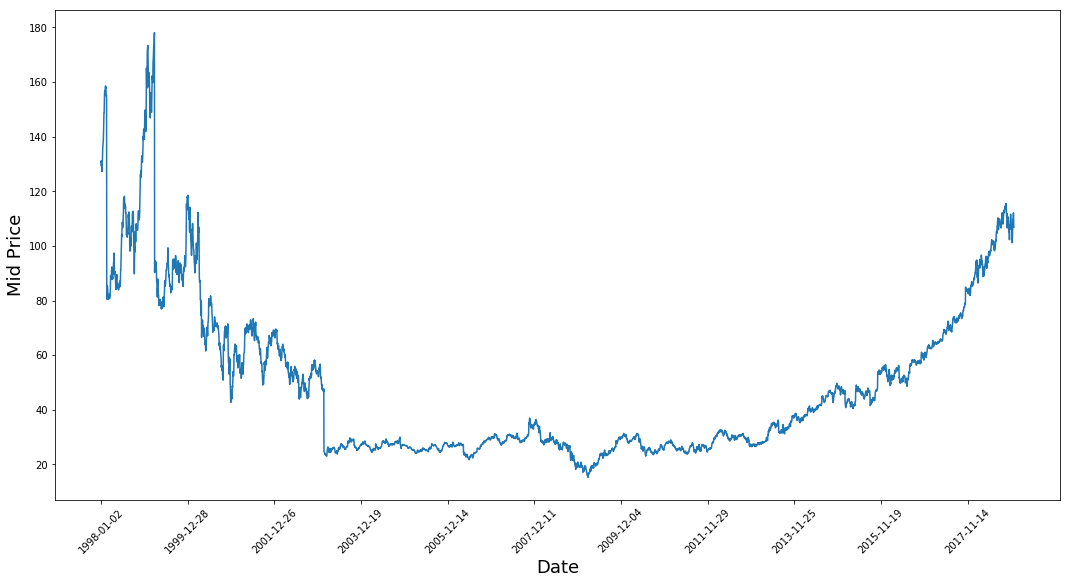

In [3]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [69]:
# calcualte mid prices
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

# adding features
msftpe = msft.loc[:,'PE_RATIO'].as_matrix()
msfteps = msft.loc[:,'IS_EPS'].as_matrix()
msftbeta = msft.loc[:,'BETA_RAW_OVERRIDABLE'].as_matrix()


# Setup array to add fefatures
mid_prices = [[x] for x in mid_prices]

for i in range(len(mid_prices)):
    mid_prices[i].append(msftpe[i])
    mid_prices[i].append(msfteps[i])
    mid_prices[i].append(msftbeta[i])



c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [133]:
#  split data into train/tests
mp = len(mid_prices)//2
train_data, test_data = [], []
for i in range(mp):
    train_data.append(mid_prices[i])
    test_data.append(mid_prices[mp + i])
# train_data = mid_prices[:mp]
# test_data = mid_prices[mp:]


In [148]:
print(len(train_data))

10536


In [147]:
print(train_data[4])

[0.82442073]


In [140]:
print(train_data[0:0+650,:])

TypeError: list indices must be integers or slices, not tuple

In [141]:
scaler = MinMaxScaler()
train_data = np.asarray(train_data).reshape(-1,1)
test_data = np.asarray(test_data).reshape(-1,1)

smoothing_window_size = mp//4
for di in range(0,mp,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])
if (di+smoothing_window_size < len(train_data)):
    scaler.fit(train_data[di+smoothing_window_size:,:])
    train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])
    
for di in range(0,mp,smoothing_window_size):
    scaler.fit(test_data[di:di+smoothing_window_size,:])
    test_data[di:di+smoothing_window_size,:] = scaler.transform(test_data[di:di+smoothing_window_size,:])
if (di+smoothing_window_size < len(train_data)):
    scaler.fit(test_data[di+smoothing_window_size:,:])
    test_data[di+smoothing_window_size:,:] = scaler.transform(test_data[di+smoothing_window_size:,:])

In [155]:
train_data_2 = []
c = 0
t = []
for i in range(len(train_data)):
    t.extend(train_data[i])
    c += 1
    if (c == 4):
        train_data_2.append(t[:])
        t = []
        c = 0
print(len(train_data_2))

2634


In [157]:
test_data_2 = []
c = 0
t = []
for i in range(len(test_data)):
    t.extend(test_data[i])
    c += 1
    if (c == 4):
        test_data_2.append(t[:])
        t = []
        c = 0
print(len(test_data_2))

2634


In [156]:
train_data_2[0]

[0.8228423511585328, 0.4807841404129048, 0.0, 0.006667718921649093]

Calculate EMA for next day prediction

In [126]:
import copy

In [127]:
EMA = 0.0
gamma = 0.1
for ti in range(mp):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)
cp_all_mid_data = copy.deepcopy(all_mid_data)


In [129]:
print(len(train_data))

10536


In [105]:
len(cp_all_mid_data)

21072

In [100]:
type(all_mid_data)

numpy.ndarray

In [186]:
print(N)

10536


In [191]:
train_data_2 = np.array(train_data_2)
window_size = 100
N = train_data_2.size
N //= 4
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N-1):
#     print(pred_idx)
    if pred_idx < N:
        if pred_idx >= N:
            date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
        else:
            date = df.loc[pred_idx,'Date']
    
    std_avg_predictions.append(np.mean(train_data_2[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data_2[pred_idx])**2)
    std_avg_x.append(date)


print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.03249


In [192]:
len(df)

5268

In [193]:
len(all_mid_data)

21072

ValueError: x and y must have same first dimension, but have shapes (5268,) and (21072, 1)

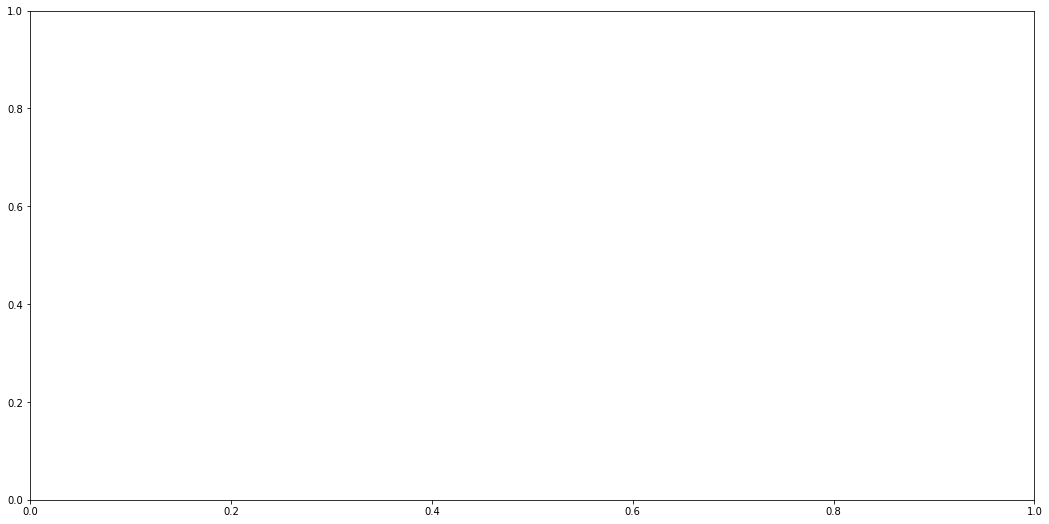

In [167]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [203]:
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data_2,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)

ValueError: setting an array element with a sequence.

In [202]:
D = 2 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times

In [196]:
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))


In [197]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

In [198]:
c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

In [199]:
print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


In [200]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


In [201]:
epochs = 2
valid_summary = 1 # Interval you make test predictions

n_predict_once = 50 # Number of steps you continously predict for

train_seq_length = train_data_2.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data_2,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(mp,mp+1000,50).tolist()
for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.asscalar(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

Initialized


ValueError: setting an array element with a sequence.

In [ ]:
best_prediction_epoch = 1 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
# plt.plot(range(df.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(mp,mp + 1000)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(mp,mp + 1000)
plt.show(mp,mp + 1000)

In [ ]:
print(all_mid_data[0])

In [98]:
print(len(all_mid_data))

21072


In [97]:
print(df.shape[0]
     
     

5268
